In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix


In [2]:
# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Print training data-related information
print("Shape of training data:", X_train.shape)
print("First 5 labels:", Y_train[:5])


Shape of training data: (50000, 32, 32, 3)
First 5 labels: [[6]
 [9]
 [9]
 [4]
 [1]]


In [3]:
# Build CNN model
classifier = Sequential()

# Add convolutional layers, LeakyReLU, max pooling, and dropout
classifier.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
classifier.add(LeakyReLU(alpha=0.3))
classifier.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
classifier.add(LeakyReLU(alpha=0.3))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
classifier.add(LeakyReLU(alpha=0.3))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
classifier.add(LeakyReLU(alpha=0.3))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

# Flatten the output of the last convolutional layer
classifier.add(Flatten())

# Add a fully connected layer with dropout
classifier.add(Dense(1024))
classifier.add(LeakyReLU(alpha=0.3))
classifier.add(Dropout(0.5))

# Add output layer with softmax activation for classification
classifier.add(Dense(10, activation='softmax'))


In [4]:
# Compile CNN model
classifier.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(0.0001,1e-6),
    metrics=['accuracy']
)

# Train CNN model
history = classifier.fit(
    X_train / 255.0,
    to_categorical(Y_train),
    batch_size=128,
    shuffle=True,
    steps_per_epoch=10,
    epochs=70,
    validation_data=(X_test / 255.0, to_categorical(Y_test)),
    callbacks=[EarlyStopping(min_delta=0.01, patience=4)]
)


Epoch 1/70
10/10 [==============================] - 13s 299ms/step - loss: 2.3046 - accuracy: 0.1070 - val_loss: 2.2924 - val_accuracy: 0.1023
Epoch 2/70
10/10 [==============================] - 2s 170ms/step - loss: 2.2855 - accuracy: 0.1430 - val_loss: 2.2807 - val_accuracy: 0.1755
Epoch 3/70
10/10 [==============================] - 1s 121ms/step - loss: 2.2697 - accuracy: 0.1352 - val_loss: 2.2550 - val_accuracy: 0.1338
Epoch 4/70
10/10 [==============================] - 2s 193ms/step - loss: 2.2219 - accuracy: 0.1703 - val_loss: 2.1985 - val_accuracy: 0.2293
Epoch 5/70
10/10 [==============================] - 1s 91ms/step - loss: 2.1519 - accuracy: 0.2008 - val_loss: 2.2047 - val_accuracy: 0.1471
Epoch 6/70
10/10 [==============================] - 1s 96ms/step - loss: 2.1267 - accuracy: 0.2086 - val_loss: 2.0960 - val_accuracy: 0.2455
Epoch 7/70
10/10 [==============================] - 1s 96ms/step - loss: 2.0766 - accuracy: 0.2359 - val_loss: 2.0488 - val_accuracy: 0.2899
Epoch 8/

313/313 [==============================] - 1s 3ms/step - loss: 1.7346 - accuracy: 0.3882
Loss: 1.7345653772354126
Accuracy: 0.3882000148296356


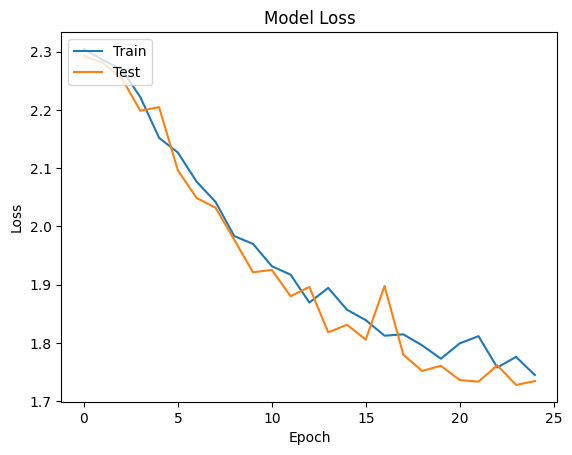

In [5]:
# Evaluate CNN model
scores = classifier.evaluate(X_test / 255.0, to_categorical(Y_test))
print('Loss:', scores[0])
print('Accuracy:', scores[1])

# Check for overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


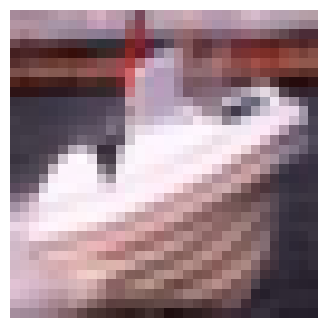

1/1 [==============================] - 0s 265ms/step
Predicted class: 5


In [6]:
# Make predictions
sample_id = 108
plt.figure(figsize=(4, 4))
plt.imshow(X_test[sample_id])
plt.axis('off')
plt.show()

print("Predicted class:", np.argmax(classifier.predict((X_test[sample_id].reshape((1,) + X_test[sample_id].shape) / 255.0))))


In [7]:
# Print confusion matrix
Y_preds = classifier.predict(X_test / 255.0)
cm = confusion_matrix(Y_test.argmax(axis=1), Y_preds.argmax(axis=1))
print("Confusion Matrix:")
print(cm)


313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[2229 1369  932  488  810  561  940  963  961  747]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
